#Inaugural project

#Group: Anders&Frederik

#Group members: Frederik Andresen, rjv586. Anders Meelby, zpw586.

#Question 1

We first assign the parameters their values and define the utility function and the budget constraint. 

In [6]:
import numpy as np
from scipy import optimize
# autoreload modules when c"""  """ode is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:

#1.1. Defining globals
m  = 1 #cash-on-hand
v  = 10 #scales the disutility of labor
e  = 0.3 #Frisch elasticity of labor supply
k  = 0.4 #cut-off for the top labor income bracket
t0 = 0.4 #standard labor income tax
t1 = 0.1 #top bracket labor income tax
w  = 1 #wage is assumed exogenous for now

#1.2. Defining utility
def utility(l,c,e,v):
    u = np.log(c) - v*l**(1 + 1/e)/(1 + 1/e)
    return u

#1.3. Defining budget constraint
def bc(m,w,l,t0,t1,k):
    budget = m + w*l - w*l*t0 - t1*max((w*l - k),0)
    return budget

We then define the budget constraint where we substitute c* into x using that c* = x. The objective function "utility" returns the negative value of the utility given a level of consumption- and a labor supply. This function returns a negative function as scipy optimize.minimize_scalar minimizes why minimizing a negative function is equivalent to maximizing. 

In [8]:
#1.4. Substituting c into budget constraint as c*=x; creating a function l*(l)
def c_sub(l,w,e,v,t0,t1,k):
    c = bc(m,w,l,t0,t1,k)
    return -utility(l,c,e,v)

We then define out optimiser "opt" using scipy optimize; the function "opt" uses c as a function of l to  maximize labor supply given the parameter values using the bounds of (0,1) to the labor supply. The function returns a list of optimal labour supply values from the parameters (floats). 
Subsequently, we plug the optimal labor supply into the budget constraint to determine the optimal consumption. Ultimally, we plug the optimal labor supply and -consumption into the "utility" to obtain the maximized level of utility. 

In [9]:
#1.5. Finding the l that optimizes l*
def optimizer(w,e,v,t0,t1,k,m):
    sol = optimize.minimize_scalar(
        c_sub, method = 'bounded',
        bounds=(0,1), 
        args = (w,e,v,t0,t1,k))

    lstar = sol.x
    cstar = bc(m,w,lstar,t0,t1,k)
    ustar = utility(lstar,cstar,e,v)

    return [lstar,cstar,ustar]

This function solves the consumer maximization problem.

#Question 2

We plot the optimal labor supply and -consumption as functions of the wage rate. Consequently, we import pyplot from matplotlib. We create a vector of 10.000 evenly spaced wage rates of a specificed interval between 0.5 and 1.5 using np.linspace. For each of these vector values, we need an optimal level of labor supply and -consumption. Accordingly, we use a for-loop with enumerate to create such values into two vectors; one for optimal labor supply and one for optimal consumption. Lastly, we create a plot using the wage rate vector and the two vectors of optimal labor supply and -consumption.

<function matplotlib.pyplot.show(*args, **kw)>

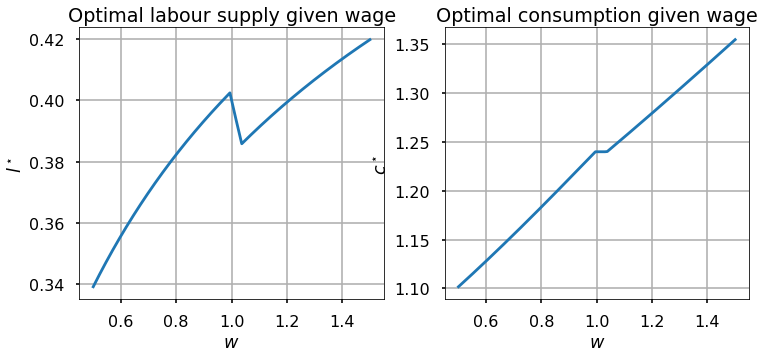

In [10]:
import matplotlib.pyplot as plt
import random
plt.style.use('seaborn-poster')

np.random.seed(7)

#2.1. Defining population size and storage vectors
N = 10000
w_vec = np.linspace(0.5, 1.5, N)
l_vec = np.empty(N)
c_vec = np.empty(N)

#2.2. For every i in w_i, we get l_i* and c_i*
for i,w in enumerate(w_vec):
    cord = optimizer(w, e, v, t0, t1, k, m)
    l_vec[i] = cord[0]
    c_vec[i] = cord[1]

#2.3. Choosing figure size
fig = plt.figure(figsize=(12,5))

#2.3.1 Plotting optimal labor supply again wage using the defined vectors
ax_left = fig.add_subplot(1,2,1)
ax_left.plot(w_vec,l_vec)

ax_left.set_title('Optimal labour supply given wage')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^\star$')
ax_left.grid(True)

#2.3.2. Plotting optimal consumption again wage using the defined vectors
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_vec,c_vec)

ax_right.set_title('Optimal consumption given wage')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')
ax_right.grid(True)

plt.show


We see that a labor supply is increasing and the kink happens at the cutoff tax-rate. Consumption is increasing with a similair kink.

#Question 3

We calculate the total tax revenue. However, firstly, we need to draw a vector of invidual wages: $w_i ~ U((0.5), (1.5))$ with a population of 10.000. From this distribution, we would need the optimal labor supply and consumption per individual, $i$. We apply the optimizer-function "opt" to return the tax payment for each indiviual given the optimal labor supply and -consumption. 

In [11]:

#3.1. Drawing 10.000 random wage rates from a uniform distribution in the interval (0.5, 1.5)
np.random.seed(7)
Wage_draw = np.random.uniform(0.5,1.5,size=10000)


def Total_tax(PopWageVector,e,v,t0,t1,k,m):

    #3.2. Returning an array of individual tax payments
    N=len(PopWageVector)
    pop_taxes=np.zeros((N))

    #3.2 For each wage rate, return the optimal labor supply by using the optimizer function
    for i,w in enumerate(PopWageVector):
        the_optimum=optimizer(w,e,v,t0,t1,k,m)
        opt_labor=the_optimum[0]
    
        #3.2.1. Returning tax payment given the optimal labor supply
        pop_taxes[i]=t0*w*opt_labor+t1*max(w*opt_labor-k,0)
        
    #3.3. Summating over all tax payments
    Total_tax=sum(pop_taxes)
    return Total_tax

#3.4. Calling total tax revenue using the array of randomly drawn wages
Total_tax0 = Total_tax(Wage_draw,e,v,t0,t1,k,m)
print(f'The total tax revenue is {Total_tax0:.1f}')


The total tax revenue is 1627.2


#Question 4

Changing the Frisch elasticity to 0.1 and watching the revenue rise as it is now more optimal to supply more labor for a given wage rate. 

In [ ]:

#4.1. Defining new Frisch elasticity
e_new = 0.1

#4.2. Calling total tax revenue using the array of randomly drawn wages with the new Frisch elasticity
Tax_new = Total_tax(Wage_draw,e_new,v,t0,t1,k,m)

#4.3. Printing the result
print(f'The total tax revenue is {Tax_new:.1f}')



#Question 5
We define a new optimizer to the purpose of finding the tax rates and cutoff income that maximizes tax revenue.

In [12]:
#5.1. Defining tax function to be optimized
def tax_to_be_opt(taxes,Wages_pop,e,v,m):
    
    t0 = taxes[0]
    t1 = taxes[1]
    k = taxes[2]
    return -Total_tax(Wages_pop,e,v,t0,t1,k,m)

#5.2. Defining the 't_opt' function and finding the tax maximizing values of the vector 'taxes'.
def t_opt(Wages_pop,e,v,m):
  
    # 5.2.1. Calling optimizer
    initial_guess = [0.785,0.055,0.470]
    sol = optimize.minimize(
        tax_to_be_opt,
        initial_guess,
        method='Nelder-Mead',
        args=(Wages_pop,e,v,m))
    
    [t0star,t1star,kstar] = sol.x

    #5.2.2 Printing the solution   
    print(f'Optimal lower tax rate is {t0star:.3f}')
    print(f'Optimal upper tax rate is {t1star:.3f}')
    print(f'Optimal k income is {kstar:.3f}')
    
    return t0star,t1star,kstar

print('Optimal taxes and estimated total tax revenue')
t0star,t1star,kstar=t_opt(Wage_draw,e,v,m)
Total_tax_pop = Total_tax(Wage_draw,e,v,t0star,t1star,kstar,m)
print(f'Estimated total tax revenue is {Total_tax_pop:.2f}')


Optimal taxes and estimated total tax revenue
Optimal lower tax rate is 0.785
Optimal upper tax rate is 0.054
Optimal k income is 0.531
Estimated total tax revenue is 2462.34


#Conclusion
In this assignment we have found the optimal consumption and labor supply given certain parameter values, tax levels and wages, including the fact that both consumption and labour supply is increasing in the level of wages. In regards to the tax revenue we find that it is decreasing in the Frisch elasticity of labour supply since the revenue is larger in (4) than (3). In (5) we find that is is possible for the politician to increase the lower tax rate substantially, while the upper taxrate should be decreased in order to maximize the tax revenue.